In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading the dataset
df = pd.read_csv('Amazon_Alexa.csv')
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
def create_sentiment(val):
  if(val > 3):
    return 'Positive'
  return 'Negative'
df['sentiment'] = df['rating']
df['sentiment'] = df['sentiment'].apply(create_sentiment)

In [6]:
df.head(10)

,rating,date,variation,verified_reviews,feedback,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,Positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,Positive
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,Positive
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,Negative
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,Positive
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,Positive
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,Positive


In [ ]:
df_sentiment = df[['verified_reviews','sentiment']]
df_sentiment

,verified_reviews,sentiment
0,Love my Echo!,Positive
1,Loved it!,Positive
2,"Sometimes while playing a game, you can answer...",Positive
3,I have had a lot of fun with this thing. My 4 ...,Positive
4,Music,Positive
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",Positive
3146,"Listening to music, searching locations, check...",Positive
3147,"I do love these things, i have them running my...",Positive
3148,Only complaint I have is that the sound qualit...,Positive


In [ ]:
#Check if there are any null values
df_sentiment.isnull().sum()

verified_reviews    0
sentiment           0
dtype: int64

**Steps to Clean**<br>
> 1. Remove Stop words
> 2. Lemmatizing
> 3. remove numbers

In [ ]:
l = ['I','love','Egypt']
",".join(l)

'I,love,Egypt'

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import  word_tokenize
word_tokenize("I Love My 3 Children")

['I', 'Love', 'My', '3', 'Children']

In [ ]:
def remove_numbers(val):
  word_list = word_tokenize(val)
  word_list_no_numbers = [word for word in word_list if not word.isdigit()]
  return " ".join(word_list_no_numbers)

In [ ]:
# Test remove_numbers Function
remove_numbers("I Love My 3 Children")

'I Love My Children'

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
def clean(val):
  word_list = word_tokenize(val)
  # transform all words to lower case
  word_list = [word.lower() for word in word_list]
  # Remove Digits
  word_list = [word for word in word_list if not word.isdigit()]
  # Remove Stopwords
  stop_words = set(stopwords.words("english"))
  word_list = [word for word in word_list if word not in stop_words]
  # Lemmatizing
  lemmatizer = WordNetLemmatizer()
  word_list = [lemmatizer.lemmatize(word) for word in word_list]
  return " ".join(word_list)

In [ ]:
df_sentiment['verified_reviews'] = df_sentiment['verified_reviews'].apply(clean)
df_sentiment.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,verified_reviews,sentiment
0,love echo !,Positive
1,loved !,Positive
2,"sometimes playing game , answer question corre...",Positive
3,"lot fun thing . yr old learns dinosaur , contr...",Positive
4,music,Positive
5,received echo gift . needed another bluetooth ...,Positive
6,"without cellphone , use many feature . ipad se...",Negative
7,think 5th one 've purchased . 'm working getti...,Positive
8,look great,Positive
9,love ! ’ listened song ’ heard since childhood...,Positive


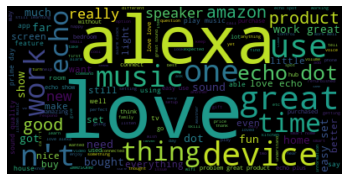

In [ ]:
import wordcloud
from wordcloud import WordCloud
common_words=''
for review in df_sentiment['verified_reviews']:
    common_words += " "+review
wordcloud = WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encoded the target column
lb=LabelEncoder()
df_sentiment['sentiment'] = lb.fit_transform(df_sentiment['sentiment'])
df_sentiment.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,verified_reviews,sentiment
0,love echo !,1
1,loved !,1
2,"sometimes playing game , answer question corre...",1
3,"lot fun thing . yr old learns dinosaur , contr...",1
4,music,1
5,received echo gift . needed another bluetooth ...,1
6,"without cellphone , use many feature . ipad se...",0
7,think 5th one 've purchased . 'm working getti...,1
8,look great,1
9,love ! ’ listened song ’ heard since childhood...,1


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df_sentiment['verified_reviews'].values)
X = tokenizer.texts_to_sequences(df['verified_reviews'].values)
X[:5]

[[1, 2],
 [191, 259],
 [202, 110, 243, 145, 90, 4, 49, 259, 466, 280, 160, 7, 64, 58, 257, 27],
 [160, 74, 42, 21, 147, 160, 85, 280, 25, 7, 73, 10, 110, 5, 41],
 [5]]

In [ ]:
X = pad_sequences(X)
X[:5]

array([[  0,   0,   0, ...,   0,   1,   2],
       [  0,   0,   0, ...,   0, 191, 259],
       [  0,   0,   0, ...,  58, 257,  27],
       [  0,   0,   0, ..., 110,   5,  41],
       [  0,   0,   0, ...,   0,   0,   5]], dtype=int32)

In [ ]:
X.shape

(3150, 221)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 221, 120)          60000     
                                                                 
 lstm_1 (LSTM)               (None, 176)               209088    
                                                                 
 dense_1 (Dense)             (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
y = df_sentiment['sentiment'].values
y.shape

(3150,)

In [ ]:
from sklearn.model_selection import train_test_split 
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, batch_size=16, validation_data = (X_test,y_test))

Epoch 1/10
138/138 [==============================] - 117s 826ms/step - loss: 0.3669 - accuracy: 0.8744 - val_loss: 0.3260 - val_accuracy: 0.8709
Epoch 2/10
138/138 [==============================] - 113s 821ms/step - loss: 0.2406 - accuracy: 0.9102 - val_loss: 0.2631 - val_accuracy: 0.8836
Epoch 3/10
138/138 [==============================] - 113s 820ms/step - loss: 0.1802 - accuracy: 0.9320 - val_loss: 0.2406 - val_accuracy: 0.8974
Epoch 4/10
138/138 [==============================] - 113s 821ms/step - loss: 0.1542 - accuracy: 0.9429 - val_loss: 0.2663 - val_accuracy: 0.8952
Epoch 5/10
138/138 [==============================] - 113s 817ms/step - loss: 0.1271 - accuracy: 0.9506 - val_loss: 0.2724 - val_accuracy: 0.9037
Epoch 6/10
138/138 [==============================] - 112s 815ms/step - loss: 0.1048 - accuracy: 0.9615 - val_loss: 0.2554 - val_accuracy: 0.9069
Epoch 7/10
138/138 [==============================] - 112s 811ms/step - loss: 0.0931 - accuracy: 0.9660 - val_loss: 0.3045 -

In [ ]:
model.evaluate(X_test,y_test)

30/30 [==============================] - 3s 112ms/step - loss: 0.3687 - accuracy: 0.8783


[0.36874666810035706, 0.8783068656921387]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


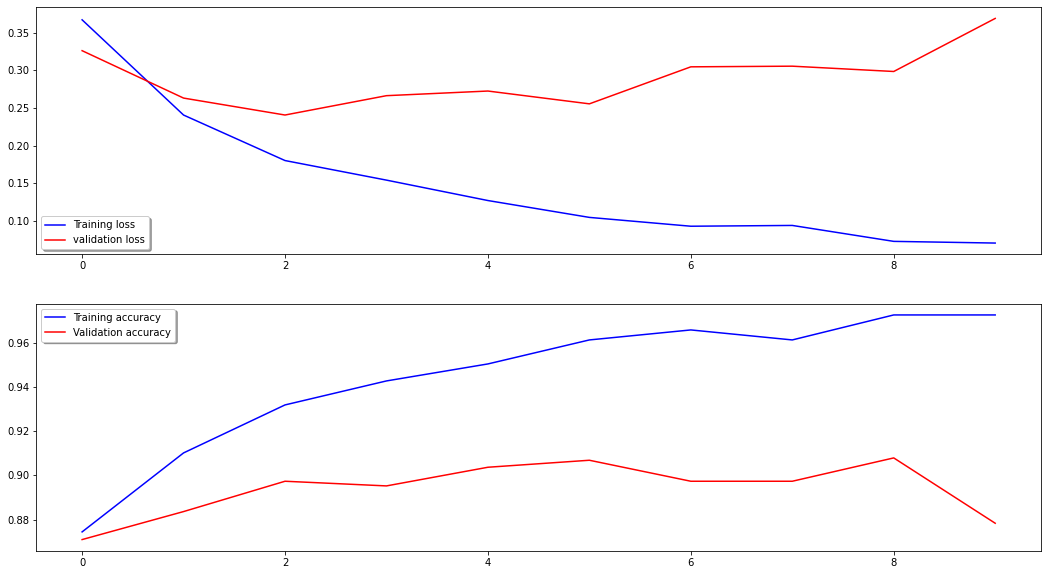

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)